In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
mpesa_data = pd.read_csv('mpesa_statements.csv')

# Display the first few rows of the dataset
print(mpesa_data.head())

# Display basic information about the dataset
print(mpesa_data.info())

   customer_id transaction_id  received_amount  balance_then  sent_amount  \
0          388     MC70545UF6              0.0         113.0         10.0   
1          388     MC69450ZFF              0.0         123.0         20.0   
2          388     MC573VIJND              0.0         143.0         20.0   
3          388     MC4734FVSL              0.0         163.0         10.0   
4          388     MC432USAVR              0.0         173.0         10.0   

   transaction_type transaction_datetime  statement_upload_id  
0  Airtime Purchase  2018-03-07 15:29:00              85803.0  
1  Airtime Purchase  2018-03-06 07:08:00              85803.0  
2  Airtime Purchase  2018-03-05 17:43:00              85803.0  
3  Airtime Purchase  2018-03-04 15:24:00              85803.0  
4  Airtime Purchase  2018-03-04 08:07:00              85803.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105854 entries, 0 to 105853
Data columns (total 8 columns):
 #   Column                Non-Null Count  

In [2]:
# Check for missing values in the dataset
missing_values = mpesa_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
customer_id                0
transaction_id             1
received_amount            0
balance_then               0
sent_amount                0
transaction_type           0
transaction_datetime       0
statement_upload_id     3773
dtype: int64


In [3]:

# Describe only specific numerical columns
print(mpesa_data[['received_amount', 'balance_then', 'sent_amount']].describe())


       received_amount   balance_then    sent_amount
count    105854.000000  105854.000000  105854.000000
mean        345.736242    3124.035878     345.485379
std        2322.458112    7762.098118    1975.259687
min           0.000000   -6802.110000       0.000000
25%           0.000000      41.000000       3.000000
50%           0.000000     424.310000      26.000000
75%           0.000000    2528.000000     100.000000
max       70000.000000   99001.510000   70000.000000


Investigate further why there are negative balances

In [4]:
# Filter transactions with negative balances
negative_balance_transactions = mpesa_data[mpesa_data['balance_then'] < 0]

# Display the filtered transactions
print("Transactions with Negative Balances:")
print(negative_balance_transactions)

Transactions with Negative Balances:
       customer_id transaction_id  received_amount  balance_then  sent_amount  \
2238         52361     NAA73H1B19              0.0      -3397.15       3400.0   
2258         52361     NA841TSCHC              0.0      -3383.75       3400.0   
3589         74628     NAJ9ABM3XP              0.0        -40.00         40.0   
3594         74628     NAJ1AAUHOF              0.0        -90.00         90.0   
3599         74628     NAH290Q4IU              0.0        -62.00         62.0   
...            ...            ...              ...           ...          ...   
78358       139376     NCV1VQS1GT              0.0       -479.26        480.0   
78370       139376     NCT9TYNYUJ              0.0       -476.38        480.0   
78379       139376     NCR6SM8NFA              0.0       -465.61        500.0   
78384       139376     NCR2SATN48              0.0       -450.00        450.0   
82323        64030     NBO43GCXRS              0.0       -829.79       4

- It shows that 3499 customers has Fuliza transactions - since you can transaction without 0.00 balance in actual M-Pesa account

### Explore numerical values 

In [5]:
# Define bins for each column
received_bins = [0, 1, 100, 500, 1000, 5000, 10000, 70000]
sent_bins = [0, 1, 100, 500, 1000, 5000, 10000, 70000]
balance_bins = [-7000, 0, 100, 500, 1000, 5000, 10000, 100000]

# Create frequency tables
received_freq = pd.cut(mpesa_data['received_amount'], bins=received_bins).value_counts().sort_index()
sent_freq = pd.cut(mpesa_data['sent_amount'], bins=sent_bins).value_counts().sort_index()
balance_freq = pd.cut(mpesa_data['balance_then'], bins=balance_bins).value_counts().sort_index()

# Display frequency tables
print(" Frequency Table: Received Amount")
print(received_freq)

print("\n Frequency Table: Sent Amount")
print(sent_freq)

print("\n Frequency Table: Balance Then")
print(balance_freq)



 Frequency Table: Received Amount
received_amount
(0, 1]              49
(1, 100]          8684
(100, 500]        5800
(500, 1000]       3246
(1000, 5000]      3940
(5000, 10000]      865
(10000, 70000]     677
Name: count, dtype: int64

 Frequency Table: Sent Amount
sent_amount
(0, 1]              828
(1, 100]          59977
(100, 500]        10563
(500, 1000]        5733
(1000, 5000]       4263
(5000, 10000]       676
(10000, 70000]      553
Name: count, dtype: int64

 Frequency Table: Balance Then
balance_then
(-7000, 0]          9981
(0, 100]           25144
(100, 500]         19934
(500, 1000]        10260
(1000, 5000]       23186
(5000, 10000]       8258
(10000, 100000]     9091
Name: count, dtype: int64


### Conclunsion:

#### **Received Amount**:
- The majority of transactions approximately 37.3% fall  small inflows. 
- There is significant portion ~24.9% of transactions are mid-sized inflows. 
- There is likely to be bulk inflows accounting for only ~3.7%.

#### **Sent Amount**:
- Most transactions ~72.6% are small outflows, likely daily expenses.
- There are mid-sized outflows  ~12.8% are also common.
- Often there is high-value outflows, making up only ~1.5% combined.

#### **Balance Then**:
- Low balances are common, with 25144 transactions ~23.7%.
- Mid-range balances dominate of 100-500, accounting for ~50.7% of transactions.
- ~8.6% of transactions range between 10000-100000 indicating less high balances.
- Negative balances ~9.4% suggest overdrafts cause by users who use Fuliza.

### Explore transaction types

Percentage of Top 10 Most Common Transaction Types:
Pay Bill Charge: 32.41%
Airtime Purchase: 19.04%
Customer Transfer of Funds Charge: 14.07%
Withdrawal Charge: 11.61%
OverDraft of Credit Party: 7.28%
M-Shwari Withdraw: 3.42%
OD Loan Repayment to  - M-PESA Overdraw: 3.16%
Pay Bill Online to  - Safaricom Offers Acc. Tunukiwa: 3.02%
Pay Bill to  - SportPesa Acc. : 3.02%
Pay Bill to  - XBET. Acc.: 2.97%


C:\Users\ELIZABETH\AppData\Local\Temp\ipykernel_38540\1006217853.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_type_counts.values[:10], y=transaction_type_counts.index[:10], palette='viridis')


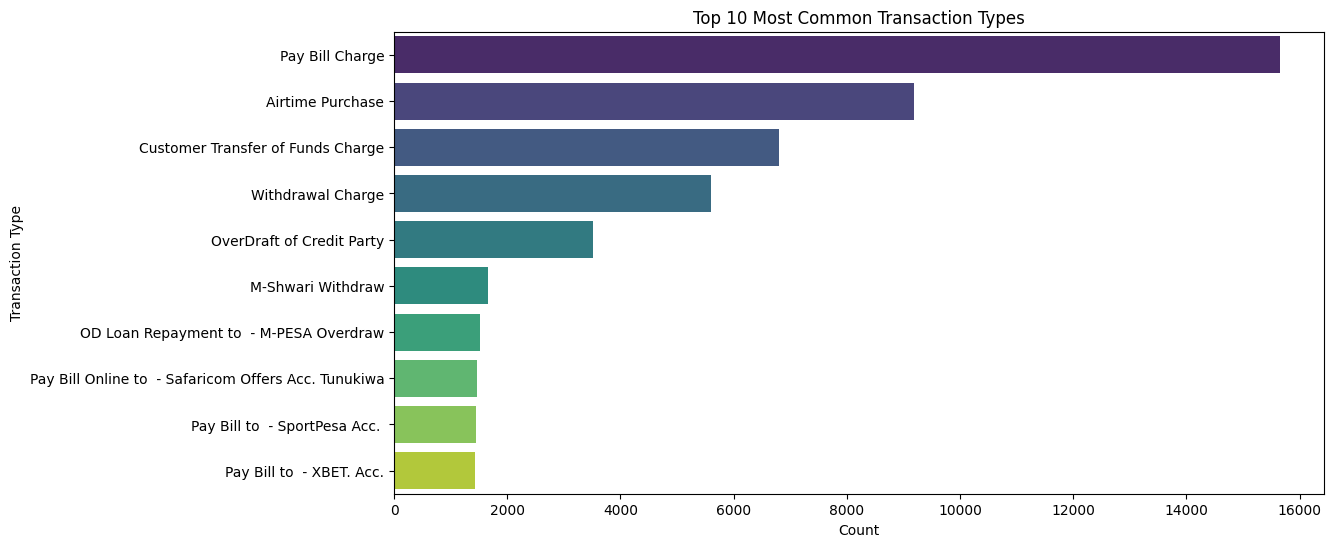

In [ ]:
# Analyze the frequency of transaction types
transaction_type_counts = mpesa_data['transaction_type'].value_counts()

# Total count of the top 10 transaction types
total_top_10 = transaction_type_counts.head(10).sum()

# Calculate the percentage for each transaction type
top_10_percentages = (transaction_type_counts.head(10) / total_top_10) * 100

# Display the percentages
print("Percentage of Top 10 Most Common Transaction Types:")
for txn_type, pct in top_10_percentages.items():
    print(f"{txn_type}: {pct:.2f}%")

# Visualize the frequency of transaction types
plt.figure(figsize=(12, 6))
sns.barplot(x=transaction_type_counts.values[:10], y=transaction_type_counts.index[:10], palette='viridis')
plt.title('Top 10 Most Common Transaction Types')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()

# Insights:
# 1. Identify the most frequent transaction types (e.g., airtime purchases, transfers, withdrawals).
# 2. Understand customer behavior, such as common spending or income patterns.
# 3. Highlight any unusual or rare transaction types that might need further investigation.

- There are various transactions where the majority is pay bill charge contributing to 32.41% followed by airtime purchases (19.04%)

## Seasonal transaction trends

In [9]:
# Preprocess the datetime column
mpesa_data['transaction_datetime'] = pd.to_datetime(mpesa_data['transaction_datetime'], errors='coerce')
mpesa_data = mpesa_data.dropna(subset=['transaction_datetime'])

# Extract seasonal features
mpesa_data['month'] = mpesa_data['transaction_datetime'].dt.month
mpesa_data['weekday'] = mpesa_data['transaction_datetime'].dt.day_name()

# Monthly trends 
monthly_trends = mpesa_data.groupby('month')[['received_amount', 'sent_amount']].sum().reset_index()
print("Monthly Transaction Trends:")
print(monthly_trends)

# Weekly trends
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_trends = (
    mpesa_data.groupby('weekday')[['received_amount', 'sent_amount']]
    .sum()
    .reindex(weekday_order)
    .reset_index()
)
print("\nWeekday Transaction Trends:")
print(weekday_trends)

# Spending Consistency per customer
consistency = (
    mpesa_data.groupby('customer_id')['sent_amount']
    .agg(['mean', 'std'])
    .rename(columns={'mean': 'sent_mean', 'std': 'sent_std'})
)
consistency['sent_cv'] = consistency['sent_std'] / (consistency['sent_mean'] + 1e-6)
print("\nSpending Consistency (CV of sent_amount):")
print(consistency.head())

# Inflow-Outflow Ratio per customer
io = (
    mpesa_data.groupby('customer_id')
    .agg(total_inflows=('received_amount', 'sum'),
         total_outflows=('sent_amount', 'sum'))
)
io['inflow_outflow_ratio'] = io['total_inflows'] / (io['total_outflows'] + 1e-6)
print("\nInflow-Outflow Ratio per Customer:")
print(io.head())


Monthly Transaction Trends:
    month  received_amount  sent_amount
0       1       4425971.23   4405592.74
1       2       3582748.46   3499222.69
2       3       3615173.54   3671825.74
3       4       3184684.84   3238716.99
4       5       2982455.40   2935227.97
5       6       1825433.42   1836244.59
6       7       2950790.06   2962172.63
7       8       2223182.43   2172182.20
8       9       2196325.14   2280716.10
9      10       2756944.00   2741951.04
10     11       3360095.72   3383341.97
11     12       3464690.94   3432050.65

Weekday Transaction Trends:
     weekday  received_amount  sent_amount
0     Monday       5055322.63   5190934.55
1    Tuesday       5981201.45   5854820.35
2  Wednesday       5516863.24   5580989.90
3   Thursday       5716660.89   5288780.37
4     Friday       5856534.27   5667655.52
5   Saturday       5213639.44   5390602.47
6     Sunday       3228273.26   3585462.15

Spending Consistency (CV of sent_amount):
              sent_mean     sent_std

### Visualizations

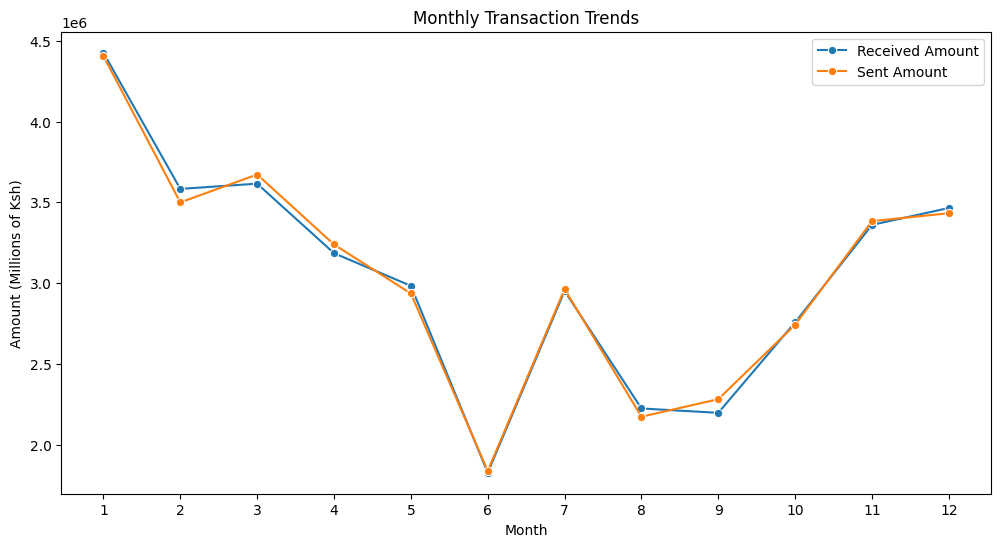

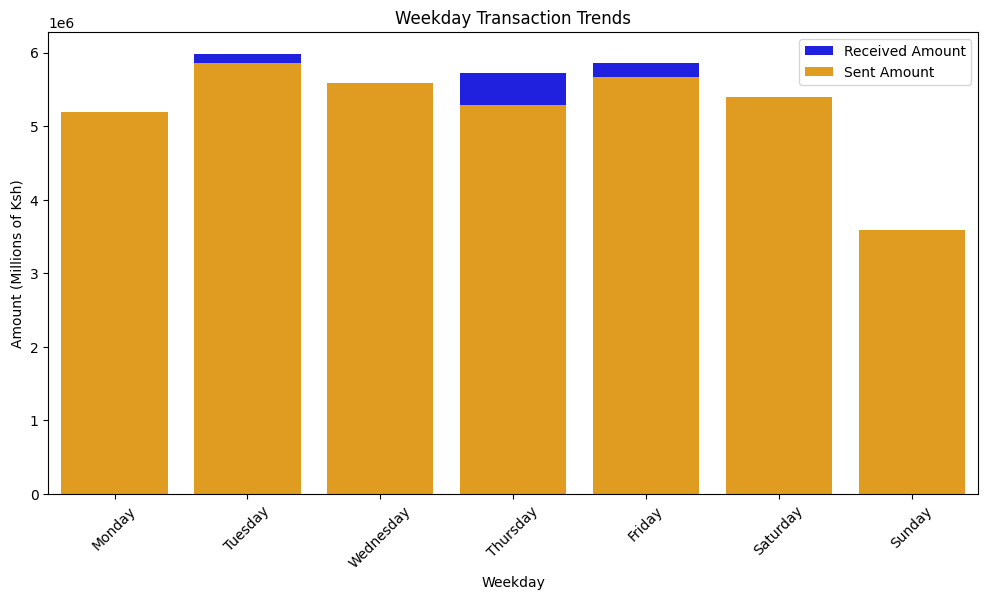

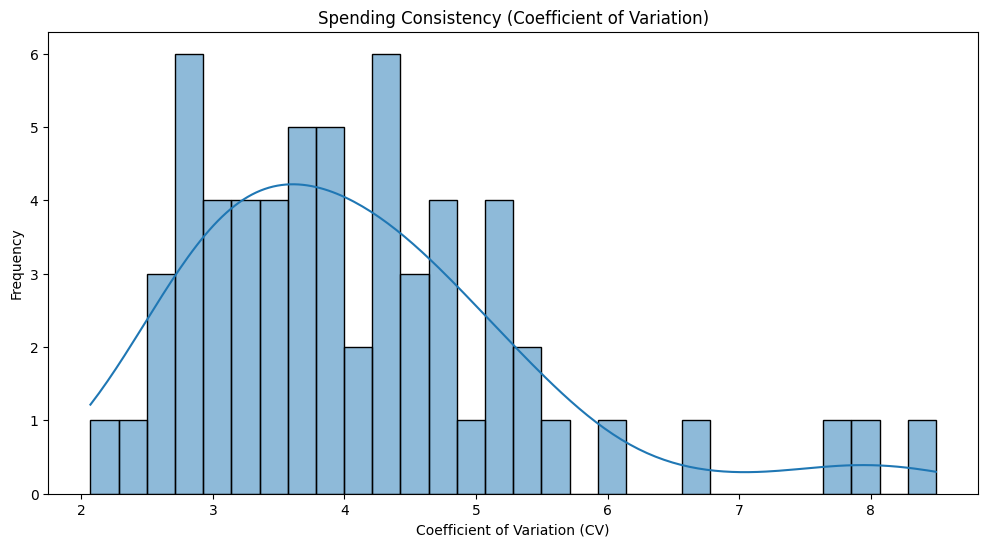

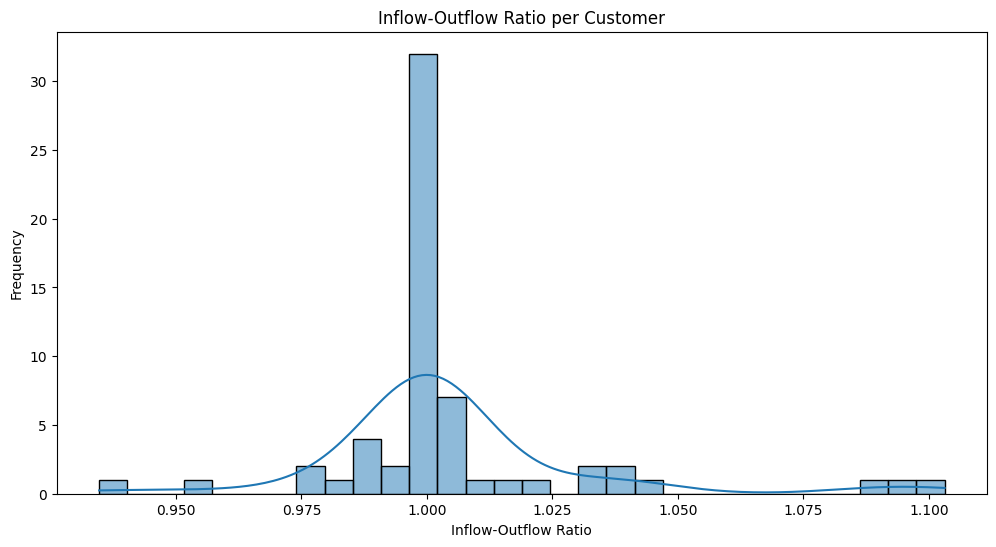

In [11]:
# Visualize monthly trends
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=monthly_trends, x='month', y='received_amount', label='Received Amount', marker='o')
sns.lineplot(data=monthly_trends, x='month', y='sent_amount', label='Sent Amount', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Amount (Millions of Ksh)')
plt.xticks(monthly_trends['month'])
plt.legend()
plt.show()

# Visualize weekday trends
plt.figure(figsize=(12, 6)) 
sns.barplot(data=weekday_trends, x='weekday', y='received_amount', color='blue', label='Received Amount')
sns.barplot(data=weekday_trends, x='weekday', y='sent_amount', color='orange', label='Sent Amount')
plt.title('Weekday Transaction Trends')
plt.xlabel('Weekday')
plt.ylabel('Amount (Millions of Ksh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
# Visualize spending consistency
plt.figure(figsize=(12, 6)) 
sns.histplot(consistency['sent_cv'], bins=30, kde=True)
plt.title('Spending Consistency (Coefficient of Variation)')
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Frequency')
plt.show()
# Visualize inflow-outflow ratio
plt.figure(figsize=(12, 6))
sns.histplot(io['inflow_outflow_ratio'], bins=30, kde=True)
plt.title('Inflow-Outflow Ratio per Customer')
plt.xlabel('Inflow-Outflow Ratio')
plt.ylabel('Frequency')
plt.show()

### Loan Repayment Data

In [12]:
# Load the loan repayment data
loan_repayment_data = pd.read_csv('loan_repayment_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(loan_repayment_data.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(loan_repayment_data.info())

# Check for missing values
missing_values = loan_repayment_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


First few rows of the dataset:
   customer_id  loan_id new_repeat Funded_date    due_date  loan_duration  \
0        27210    36747     REPEAT  11/16/2018  12/16/2018             30   
1        23510    21936     REPEAT   10/5/2018   11/4/2018             30   
2        20035    17740        NEW   9/20/2018  10/20/2018             30   
3        12293    17142        NEW   9/18/2018  10/18/2018             30   
4         1775     5070     REPEAT   8/29/2017   9/28/2017             30   

   loan_amount  to_repay  interest_amount  repaid_amount  loan_balance  \
0         1750      1975              175            700          1275   
1          500       600               50            100           500   
2          500       600               50            200           400   
3         2000      2280              200             48          2232   
4         3000      3450              300           1050          2400   

  last_paid_date  
0     11/25/2019  
1      5/23/2019  
2   

In [13]:
# Summary statistics for numerical columns
# List of columns of interest
columns = [
    'loan_duration',
    'loan_amount',
    'to_repay',
    'interest_amount',
    'repaid_amount',
    'loan_balance'
]

# Display summary statistics
summary_stats = loan_repayment_data[columns].describe()
print(summary_stats.round(2))  # Rounded to 2 decimal places


       loan_duration  loan_amount  to_repay  interest_amount  repaid_amount  \
count           61.0        61.00     61.00            61.00          61.00   
mean            30.0      1382.79   1592.74           139.80        1080.54   
std              0.0      1086.16   1218.58           102.73         785.29   
min             30.0       500.00    580.00            40.00          48.00   
25%             30.0       500.00    600.00            50.00         600.00   
50%             30.0      1000.00   1150.00           100.00         625.00   
75%             30.0      2000.00   2280.00           200.00        1700.00   
max             30.0      6000.00   6600.00           540.00        2280.00   

       loan_balance  
count         61.00  
mean         515.31  
std         1190.84  
min            0.00  
25%            0.00  
50%            0.00  
75%          400.00  
max         6100.00  


### Conclusion

- All loans are short-term (30 days) with interest ranging from 40.00 - 540.00 where the averga interest is 139.80
- Loan amounts range from 500.00 to 6000.00. Half of the loans are below 1000.00, and 75% are below 2000.00, suggesting most loans are small to medium-sized.
-  The repayment amounts reflects interst ranging from 580.00 to 6600.00 with a mean of 1592.74. This amount is generally higher than the loan amount.
- 50% of loans have repaid amounts below 625.00, indicating partial repayments are common. These amounts range from 48.00 to 2280.00.
- Half of the the loans have been repaid (balance of 0.00). A small portion of loans has high balances, suggesting some borrowers struggle to repay.


### Class distribution of new and repeat customers

Class Distribution:
new_repeat
NEW       54
REPEAT     7
Name: count, dtype: int64


C:\Users\ELIZABETH\AppData\Local\Temp\ipykernel_26748\3905039651.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


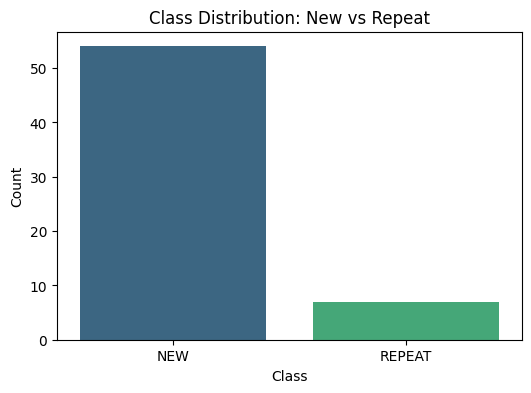

In [14]:
# Convert 'new_repeat' into a categorical class
loan_repayment_data['new_repeat'] = loan_repayment_data['new_repeat'].astype('category')

# Explore the class distribution
class_distribution = loan_repayment_data['new_repeat'].value_counts()

# Display the class distribution
print("Class Distribution:")
print(class_distribution)

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution: New vs Repeat')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Missed repayment signals

In [15]:
import pandas as pd
import numpy as np

# Load loan data
loan_data = pd.read_csv('loan_repayment_data.csv')

# Parse date columns
loan_data['funded_date']     = pd.to_datetime(loan_data['Funded_date'], errors='coerce')
loan_data['due_date']        = pd.to_datetime(loan_data['due_date'], errors='coerce')
loan_data['last_paid_date']  = pd.to_datetime(loan_data['last_paid_date'], errors='coerce')


In [16]:
#  repayment outcome & lateness
# 1. Fully repaid on or before due date?
loan_data['fully_repaid_on_time'] = (
    (loan_data['loan_balance'] == 0) &
    (loan_data['last_paid_date'] <= loan_data['due_date'])
)

# 2. Days overdue (if repaid after due date)
loan_data['days_overdue'] = np.where(
    loan_data['loan_balance'] == 0,
    (loan_data['last_paid_date'] - loan_data['due_date']).dt.days.clip(lower=0),
    np.nan
)

# 3. Partial or missed repayment (balance > 0 after due date)
loan_data['missed_repayment'] = (
    (loan_data['due_date'] < pd.Timestamp.today()) &
    (loan_data['loan_balance'] > 0)
)

loan_data[['customer_id','due_date','last_paid_date',
      'loan_balance','fully_repaid_on_time','days_overdue','missed_repayment']].head()


,customer_id,due_date,last_paid_date,loan_balance,fully_repaid_on_time,days_overdue,missed_repayment
0,27210,2018-12-16,2019-11-25,1275,False,NaN,True
1,23510,2018-11-04,2019-05-23,500,False,NaN,True
2,20035,2018-10-20,2019-03-25,400,False,NaN,True
3,12293,2018-10-18,2021-05-25,2232,False,NaN,True
4,1775,2017-09-28,2017-09-14,2400,False,NaN,True


In [17]:
# Overall rates
print("On‑time repayment rate:", 
loan_data['fully_repaid_on_time'].mean().round(2))
print("Late (but fully repaid) rate:", 
      ((loan_data['loan_balance']==0)&~loan_data['fully_repaid_on_time']).mean().round(2))
print("Missed/ongoing defaults rate:", 
loan_data['missed_repayment'].mean().round(2))

# Distribution of days overdue
print("\nDays overdue (for late repayers):")
print(loan_data['days_overdue'].dropna().describe().round(0))


On‑time repayment rate: 0.64
Late (but fully repaid) rate: 0.1
Missed/ongoing defaults rate: 0.26

Days overdue (for late repayers):
count    45.0
mean      0.0
std       2.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       9.0
Name: days_overdue, dtype: float64


In [18]:
on_time    =  loan_data[loan_data['fully_repaid_on_time']]
# loan_data[loan_data['on_time']]
late_paid  =  loan_data[~loan_data['fully_repaid_on_time'] & ~loan_data['missed_repayment']]
# loan_data[loan_data['late_paid']]
defaulted  = loan_data[loan_data['days_overdue'].notna()]
# loan_data[loan_data['defaulted']]

# Add missing columns to loan_data
loan_data['repayment_ratio'] = loan_data['repaid_amount'] / loan_data['to_repay']
loan_data['interest_rate'] = loan_data['interest_amount'] / loan_data['loan_amount']
loan_data['days_to_repay'] = (loan_data['last_paid_date'] - loan_data['funded_date']).dt.days

features = ['repayment_ratio', 'interest_rate', 'loan_amount', 'days_to_repay']

# 5) Summarize each group
print("=== On‑Time Payers (64%) ===")
print(on_time[features].describe().round(2), "\n")

print("=== Late‑But‑Paid (10%) ===")
print(late_paid[features].describe().round(2), "\n")

print("=== Defaulted (26%) ===")
print(defaulted[features].describe().round(2), "\n")

=== On‑Time Payers (64%) ===


KeyError: "['repayment_ratio', 'interest_rate', 'days_to_repay'] not in index"

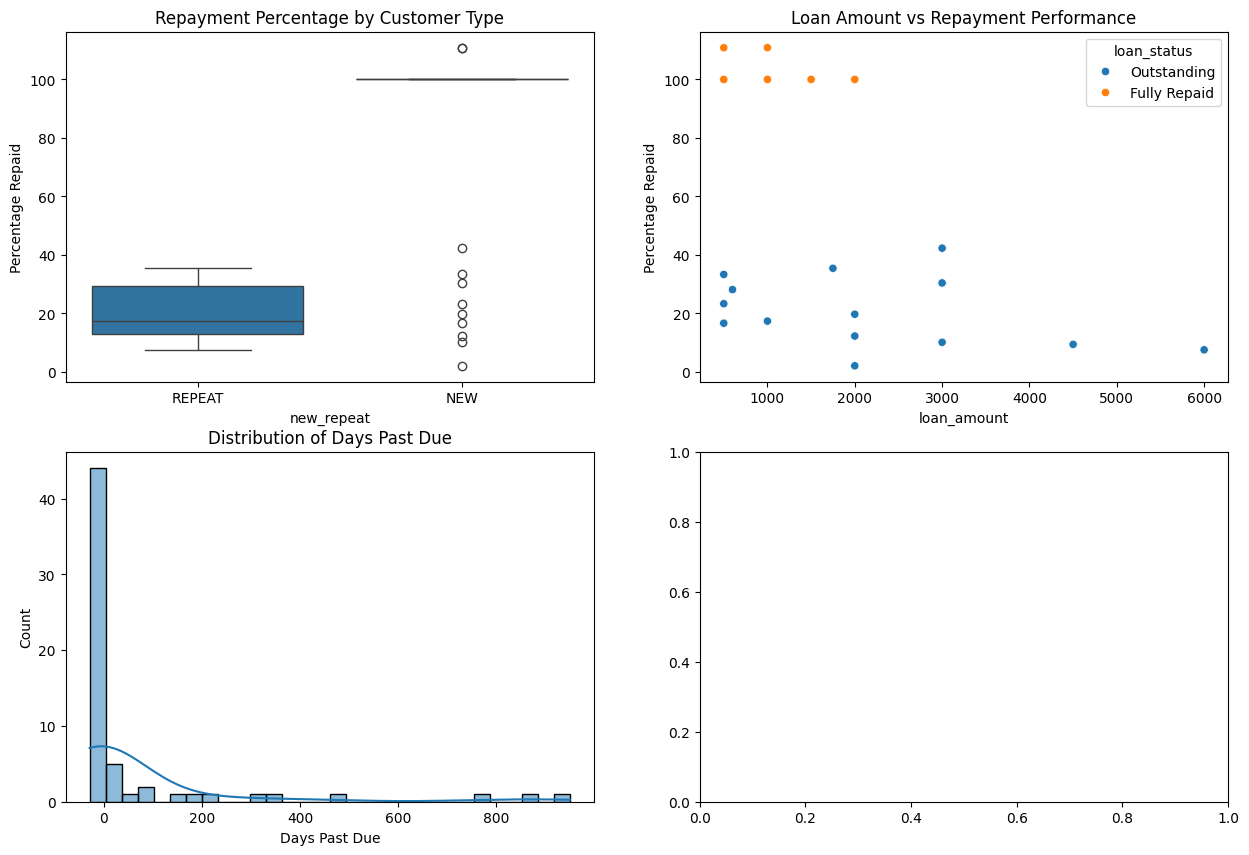

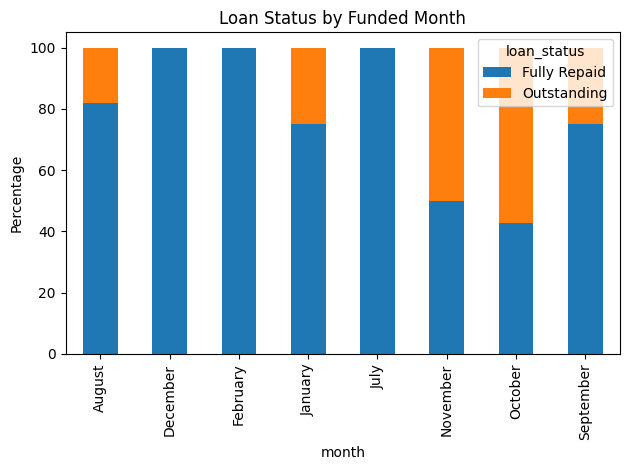

Customer Type Analysis:
            Total Loans  Avg Loan Amount  Avg Repaid %  Avg Days Past Due  \
new_repeat                                                                  
NEW                  54      1240.740741     87.260410          60.611111   
REPEAT                7      2478.571429     20.730392         102.571429   

            Fully Repaid Rate (%)  
new_repeat                         
NEW                     83.333333  
REPEAT                   0.000000  

Risk Flag Distribution:
risk_flags  Low repayment, Severe delinquency  \
new_repeat                                      
NEW                                         5   
REPEAT                                      0   

risk_flags  Low repayment, Severe delinquency, Large loan  Low risk  \
new_repeat                                                            
NEW                                                     1        45   
REPEAT                                                  0         0   

risk_flags  Repe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('loan_repayment_data.csv', parse_dates=['Funded_date', 'due_date', 'last_paid_date'])

# Data cleaning
df['loan_balance'] = df['loan_balance'].replace('-', 0).astype(float)
df['repaid_pct'] = df['repaid_amount'] / df['to_repay'] * 100
df['days_past_due'] = (df['last_paid_date'] - df['due_date']).dt.days
df['loan_status'] = np.where(df['loan_balance'] == 0, 'Fully Repaid', 'Outstanding')

# 1. Customer Type Analysis
customer_type_analysis = df.groupby('new_repeat').agg({
    'loan_id': 'count',
    'loan_amount': 'mean',
    'repaid_pct': 'mean',
    'days_past_due': 'mean',
    'loan_status': lambda x: (x == 'Fully Repaid').mean() * 100
}).rename(columns={
    'loan_id': 'Total Loans',
    'loan_amount': 'Avg Loan Amount',
    'repaid_pct': 'Avg Repaid %',
    'days_past_due': 'Avg Days Past Due',
    'loan_status': 'Fully Repaid Rate (%)'
})

# 2. Risk Indicators Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Repayment Performance by Customer Type
plt.subplot(2, 2, 1)
sns.boxplot(x='new_repeat', y='repaid_pct', data=df)
plt.title('Repayment Percentage by Customer Type')
plt.ylabel('Percentage Repaid')

# Plot 2: Loan Amount vs Repayment Status
plt.subplot(2, 2, 2)
sns.scatterplot(x='loan_amount', y='repaid_pct', hue='loan_status', data=df)
plt.title('Loan Amount vs Repayment Performance')
plt.ylabel('Percentage Repaid')

# Plot 3: Days Past Due Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['days_past_due'], bins=30, kde=True)
plt.title('Distribution of Days Past Due')
plt.xlabel('Days Past Due')

# Plot 4: Loan Status by Month
plt.subplot(2, 2, 4)
df['month'] = df['Funded_date'].dt.month_name()
status_by_month = pd.crosstab(df['month'], df['loan_status'], normalize='index') * 100
status_by_month.plot(kind='bar', stacked=True)
plt.title('Loan Status by Funded Month')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

# 3. Risk Flagging
def flag_high_risk(row):
    flags = []
    if row['new_repeat'] == 'REPEAT' and row['loan_balance'] > 0:
        flags.append('Repeat with balance')
    if row['repaid_pct'] < 30:
        flags.append('Low repayment')
    if row['days_past_due'] > 30:
        flags.append('Severe delinquency')
    if row['loan_amount'] > df['loan_amount'].quantile(0.75):
        flags.append('Large loan')
    return ', '.join(flags) if flags else 'Low risk'

df['risk_flags'] = df.apply(flag_high_risk, axis=1)

# 4. Key Metrics Table
risk_metrics = df.pivot_table(
    index='new_repeat',
    columns='risk_flags',
    values='loan_id',
    aggfunc='count',
    fill_value=0
)

print("Customer Type Analysis:")
print(customer_type_analysis)
print("\nRisk Flag Distribution:")
print(risk_metrics)

# 5. Seasonal Analysis
monthly_trends = df.groupby([df['Funded_date'].dt.year, df['Funded_date'].dt.month]).agg({
    'loan_amount': 'sum',
    'repaid_pct': 'mean',
    'loan_status': lambda x: (x == 'Fully Repaid').mean()
}).rename(columns={
    'loan_amount': 'Total Loan Volume',
    'repaid_pct': 'Avg Repaid %',
    'loan_status': 'Fully Repaid Rate'
})

print("\nMonthly Trends Analysis:")
print(monthly_trends)

Text(0, 0.5, 'Percentage Repaid')

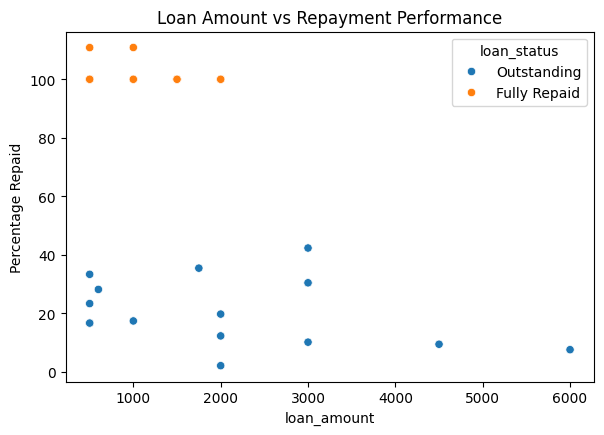

In [ ]:
# Convert dates to datetime format
loan_repayment_data['Funded_date'] = pd.to_datetime(loan_repayment_data['Funded_date'], errors='coerce')
loan_repayment_data['due_date'] = pd.to_datetime(loan_repayment_data['due_date'], errors='coerce')
# loan_repayment_data['due_date'] = pd.to_datetime(loan_repayment_data['due_date'], errors='coerce')
loan_repayment_data['last_paid_date'] = pd.to_datetime(loan_repayment_data['last_paid_date'], errors='coerce')

# Data cleaning
loan_repayment_data['loan_balance'] = loan_repayment_data['loan_balance'].replace('-', 0).astype(float)
loan_repayment_data['repaid_pct'] = loan_repayment_data['repaid_amount'] / loan_repayment_data['to_repay'] * 100
loan_repayment_data['days_past_due'] = (loan_repayment_data['last_paid_date'] - loan_repayment_data['due_date']).dt.days
loan_repayment_data['loan_status'] = np.where(loan_repayment_data['loan_balance'] == 0, 'Fully Repaid', 'Outstanding')
# loan_repayment_data['loan_status'] = np.where(loan_repayment_data['loan_balance'] == 0, 'Fully Repaid', 'Outstanding')

# 1. Customer Type Analysis
customer_type_analysis = loan_repayment_data.groupby('new_repeat').agg({
    'loan_id': 'count',
    'loan_amount': 'mean',
    'repaid_pct': 'mean',
    'days_past_due': 'mean',
    'loan_status': lambda x: (x == 'Fully Repaid').mean() * 100
}).rename(columns={
    'loan_id': 'Total Loans',
    'loan_amount': 'Avg Loan Amount',
    'repaid_pct': 'Avg Repaid %',
    'days_past_due': 'Avg Days Past Due',
    'loan_status': 'Fully Repaid Rate (%)'
})

# 2. Risk Indicators Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Repayment Performance by Customer Type
# plt.subplot(2, 2, 1)
# sns.boxplot(x='new_repeat', y='repaid_pct', data=df)
# plt.title('Repayment Percentage by Customer Type')
# plt.ylabel('Percentage Repaid')



# Plot 2: Loan Amount vs Repayment Status
plt.subplot(2, 2, 2)
sns.scatterplot(x='loan_amount', y='repaid_pct', hue='loan_status', data=df)
plt.title('Loan Amount vs Repayment Performance')
plt.ylabel('Percentage Repaid')


In [ ]:
# Filter transactions with relevant types
relevant_transactions = mpesa_data[
    mpesa_data['transaction_type'].str.contains('Pay Bill|Deposit of Funds', case=False, na=False)
]
print("Relevant transactions for potential loan disbursement or repayment:")
print(relevant_transactions)

Relevant transactions for potential loan disbursement or repayment:
       customer_id transaction_id  received_amount  balance_then  sent_amount  \
6              388     MC362L2QNW              0.0         203.0         22.0   
7              388     MC362L2QNW              0.0         225.0        280.0   
8              388     MC382J25YQ            240.0         505.0          0.0   
9              388     MC392J1OT9            260.0         265.0          0.0   
14             388     MBG6ROB3ZG              0.0         272.0         30.0   
...            ...            ...              ...           ...          ...   
105826       65315     MA9157TF4V              0.0         308.0        195.0   
105840       65315     MA65333NG7              0.0         347.0         22.0   
105841       65315     MA65333NG7              0.0         369.0        300.0   
105849       65315     MA572L8OYD              0.0          46.0         22.0   
105850       65315     MA572L8OYD        

In [ ]:
# Check unique customer_id values in each dataset
print("Unique customer_id in loan_repayment_data:")
print(loan_repayment_data['customer_id'].unique())

print("\nUnique customer_id in mpesa_data:")
print(mpesa_data['customer_id'].unique())

# Check for common customer_id values
common_ids = set(loan_repayment_data['customer_id']).intersection(set(mpesa_data['customer_id']))
print("\nNumber of common customer_id values:", len(common_ids))



Unique customer_id in loan_repayment_data:
[ 27210  23510  20035  12293   1775   1316  19483   5266  21650   9251
   9243  54502  19250   4209   6406  44819  11997  24271  23268  67190
  12728  15299  22737  53828  10380  20755 193416  18930  23221   5345
  12871  77353     30 154392  33575  28741  17611  14196  11218 173055
  18754  13225  51171  17733  22950  50889  13403  60366  11276  17005
  21623  10084  22470  18796  45030  46809  11647  64838  47984  22842
  45645]

Unique customer_id in mpesa_data:
[   388   9284  24066  52361  74628  77520 102798  51410  63966  90313
  89690   4969  91616  94377 109678 120104 121477 121507 125944  32405
  47720   1484  30369  63211   7047  43977   6635  10197  42381   7204
  49746  67914  98352  50968   6919   4872 100756  70105 101654 102293
  78263  78245   5828 103535 103745  64030  90823   8855 109501 116293
  65315  45575 136043 139376   9089  32168   9193  37148  47551  62606
  63557]

Number of common customer_id values: 0


In [ ]:
processed_loans = []

for _, loan in loanData.iterrows():
    # Determine repayment status
    repayment_status = 'Fully Repaid' if loan['loan_balance'] == 0 else 'Defaulted'

    # Filter M-Pesa transactions before the loan was funded
    customer_mpesa = mpesaData[
        (mpesaData['customer_id'] == loan['customer_id']) &
        (mpesaData['transaction_datetime'] < loan['funded_date'])
    ]

    # Calculate financial features
    total_inflows = customer_mpesa['received_amount'].sum()
    total_outflows = customer_mpesa['sent_amount'].sum()
    avg_balance = customer_mpesa['balance_then'].mean() if not customer_mpesa.empty else 0

    # Airtime transactions
    airtime_txns = customer_mpesa[customer_mpesa['transaction_type'] == 'Airtime Purchase']
    num_airtime = len(airtime_txns)
    total_airtime = airtime_txns['sent_amount'].sum()

    # Count of previous repaid loans
    prev_loans = loanData[
        (loanData['customer_id'] == loan['customer_id']) &
        (loanData['funded_date'] < loan['funded_date'])
    ]
    num_prev_repaid = len(prev_loans[prev_loans['loan_balance'] == 0])

    # Combine original and new data
    enriched_loan = loan.to_dict()
    enriched_loan.update({
        'repaymentStatus': repayment_status,
        'totalInflows': total_inflows,
        'totalOutflows': total_outflows,
        'avgBalance': avg_balance,
        'numAirtime': num_airtime,
        'totalAirtime': total_airtime,
        'numPrevRepaid': num_prev_repaid
    })

    processed_loans.append(enriched_loan)


In [ ]:
# Check the range of customer_id values in each dataset
print("Range of customer_id in loan_repayment_data:", loan_repayment_data['customer_id'].min(), "-", loan_repayment_data['customer_id'].max())
print("Range of customer_id in mpesa_data:", mpesa_data['customer_id'].min(), "-", mpesa_data['customer_id'].max())

Range of customer_id in loan_repayment_data: 10084 - 9251
Range of customer_id in mpesa_data: 100756 - 98352


In [ ]:
from fuzzywuzzy import process

# Example: Find the closest match for each customer_id in loan_repayment_data
loan_ids = loan_repayment_data['customer_id'].tolist()
mpesa_ids = mpesa_data['customer_id'].tolist()

# Find matches
matches = [process.extractOne(id, mpesa_ids) for id in loan_ids]

# Display matches
for loan_id, match in zip(loan_ids, matches):
    print(f"Loan ID: {loan_id}, Closest Match in Mpesa: {match}")

c:\Users\ELIZABETH\anaconda3\envs\pytorch_env\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Loan ID: 27210, Closest Match in Mpesa: ('7204', 67)
Loan ID: 23510, Closest Match in Mpesa: ('52361', 60)
Loan ID: 20035, Closest Match in Mpesa: ('32405', 60)
Loan ID: 12293, Closest Match in Mpesa: ('102293', 91)
Loan ID: 1775, Closest Match in Mpesa: ('121477', 68)
Loan ID: 1316, Closest Match in Mpesa: ('101654', 68)
Loan ID: 19483, Closest Match in Mpesa: ('1484', 67)
Loan ID: 5266, Closest Match in Mpesa: ('24066', 67)
Loan ID: 21650, Closest Match in Mpesa: ('121507', 73)
Loan ID: 9251, Closest Match in Mpesa: ('109501', 68)
Loan ID: 9243, Closest Match in Mpesa: ('9284', 75)
Loan ID: 54502, Closest Match in Mpesa: ('51410', 60)
Loan ID: 19250, Closest Match in Mpesa: ('121507', 73)
Loan ID: 4209, Closest Match in Mpesa: ('47720', 67)
Loan ID: 6406, Closest Match in Mpesa: ('24066', 67)
Loan ID: 44819, Closest Match in Mpesa: ('42381', 60)
Loan ID: 11997, Closest Match in Mpesa: ('10197', 80)
Loan ID: 24271, Closest Match in Mpesa: ('42381', 60)
Loan ID: 23268, Closest Match in

In [ ]:
# Merge both datasets on customer_id
import pandas as pd

# Load the dataset
mpesa_df = pd.read_csv("mpesa_statements.csv")

# Convert transaction_datetime to datetime format
mpesa_df['transaction_datetime'] = pd.to_datetime(mpesa_df['transaction_datetime'], errors='coerce')

# Drop rows with invalid or missing dates
mpesa_df = mpesa_df.dropna(subset=['transaction_datetime'])

# Extract month and weekday
mpesa_df['month'] = mpesa_df['transaction_datetime'].dt.month
mpesa_df['weekday'] = mpesa_df['transaction_datetime'].dt.day_name()

# Group by month and calculate total received and sent amounts
monthly_activity = mpesa_df.groupby('month')[['received_amount', 'sent_amount']].sum()

# Group by weekday and calculate total received and sent amounts
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity = mpesa_df.groupby('weekday')[['received_amount', 'sent_amount']].sum().reindex(weekday_order)

# Print results
print("Monthly Transaction Activity:")
print(monthly_activity)

print("\nWeekday Transaction Activity:")
print(weekday_activity)


Monthly Transaction Activity:
       received_amount  sent_amount
month                              
1           4425971.23   4405592.74
2           3582748.46   3499222.69
3           3615173.54   3671825.74
4           3184684.84   3238716.99
5           2982455.40   2935227.97
6           1825433.42   1836244.59
7           2950790.06   2962172.63
8           2223182.43   2172182.20
9           2196325.14   2280716.10
10          2756944.00   2741951.04
11          3360095.72   3383341.97
12          3464690.94   3432050.65

Weekday Transaction Activity:
           received_amount  sent_amount
weekday                                
Monday          5055322.63   5190934.55
Tuesday         5981201.45   5854820.35
Wednesday       5516863.24   5580989.90
Thursday        5716660.89   5288780.37
Friday          5856534.27   5667655.52
Saturday        5213639.44   5390602.47
Sunday          3228273.26   3585462.15


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = loan_repayment_data.drop('new_repeat', axis=1)
y = loan_repayment_data['new_repeat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

### VISUALIZE